## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

complete_dataset = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_dataset

# see 1893 total rows 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice. (Number of unique mice IDs)
total_unique_mice = complete_dataset["Mouse ID"].unique()
print(len(total_unique_mice))


249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

complete_dataset.loc[complete_dataset.duplicated(subset=['Mouse ID','Timepoint']), :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

unique_mice_id_timepoint_df = complete_dataset.drop_duplicates(["Mouse ID", "Timepoint"])
unique_mice_id_timepoint_df.head(30)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice in the clean DataFrame.
# now 5 duplicate rows (duplicate ID and Timepoint) have been removed so total 1888 rows
len(unique_mice_id_timepoint_df)

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

# grouping by Drug Regimen and Tumour Volume
grouped_drug_regiment_Tumor_df = unique_mice_id_timepoint_df.groupby(["Drug Regimen"])['Tumour Volume (mm3)']



# finding median
Drug_Regimen_median = grouped_drug_regiment_Tumor_df.median()

Drug_Regimen_mean = grouped_drug_regiment_Tumor_df.mean()

Drug_Regimen_variance = grouped_drug_regiment_Tumor_df.var()

Drug_Regimen_st = grouped_drug_regiment_Tumor_df.std()

Drug_Regimen_sem = grouped_drug_regiment_Tumor_df.sem()

summary_df = pd.concat([Drug_Regimen_median, Drug_Regimen_mean, Drug_Regimen_variance, Drug_Regimen_st, Drug_Regimen_sem], axis=1)



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

#  assigning column names
summary_df.columns = ['Tumour Volume (mm3) Median', "Tumour Volume (mm3) Mean", "Tumour Volume (mm3) Variance", "Tumour Volume (mm3) Standard Deviation", "Tumour Volume (mm3) SEM"]

summary_df



,Tumour Volume (mm3) Median,Tumour Volume (mm3) Mean,Tumour Volume (mm3) Variance,Tumour Volume (mm3) Standard Deviation,Tumour Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.909965,52.393463,43.138803,6.568014,0.525862
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line

agg_func = unique_mice_id_timepoint_df.groupby(
    "Drug Regimen"
    ).agg(
    {
        "Tumour Volume (mm3)": ["median", "mean", "var", "std", "sem"]
    }
)

agg_func

Tumour Volume (mm3)                                          
                          median       mean        var       std       sem
Drug Regimen                                                              
Capomulin              41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin               51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol              51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril               53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol               52.509285  54.331565  66.173479  8.134708  0.596466
Placebo                52.288934  54.033581  61.168083  7.821003  0.581331
Propriva               50.909965  52.393463  43.138803  6.568014  0.525862
Ramicane               40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn               52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol              51.818479  53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

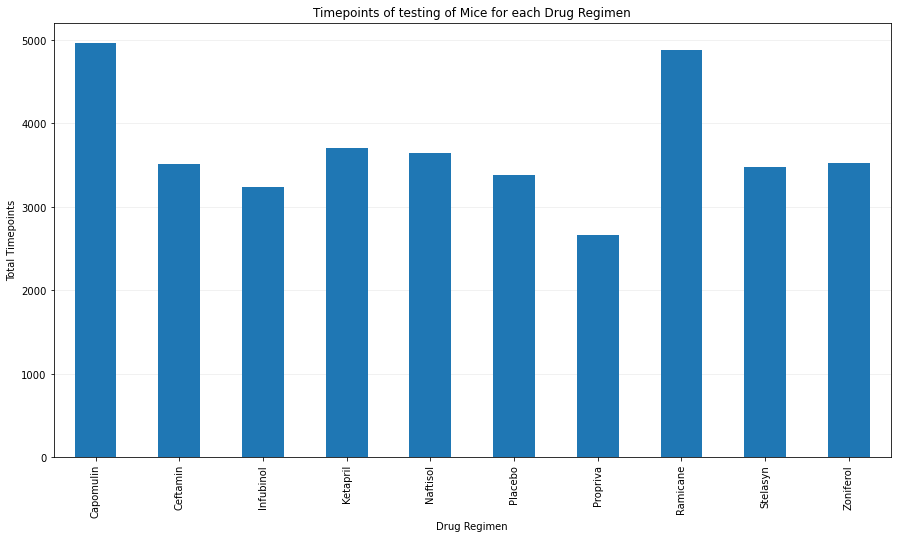

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

grouped_drug_regiment_df = unique_mice_id_timepoint_df.groupby(["Drug Regimen"])["Timepoint"].sum()


plot1 = grouped_drug_regiment_df.plot(kind="bar", x ='Drug Regimen', y = 'Timepoint', title = "Timepoints of testing of Mice for each Drug Regimen", figsize=(15,8), zorder=5)

plot1.set_ylabel("Total Timepoints")
plot1.set_xlabel("Drug Regimen")
plot1.yaxis.grid(True, color="#EEEEEE")




([<matplotlib.axis.XTick at 0x2a1bcc5d748>,
 <a list of 10 Text major ticklabel objects>)

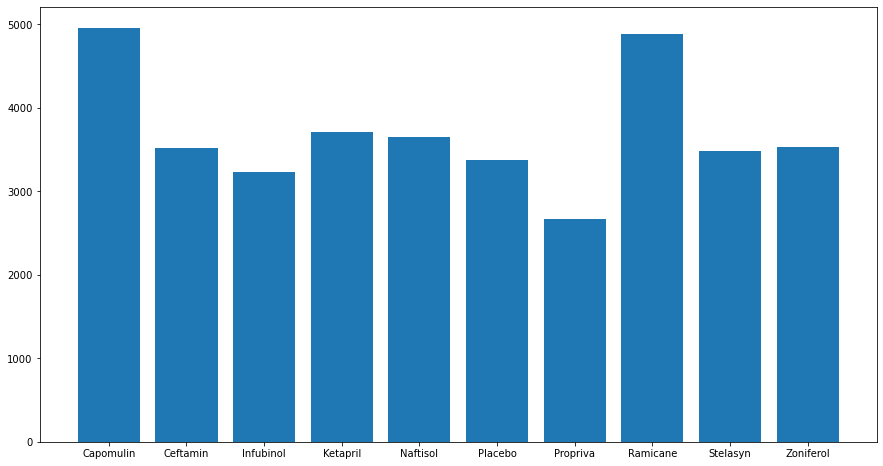

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



# y_axis = grouped_drug_regiment_df["Timepoint"].sum()
# x_axis = np.arange(len(grouped_drug_regiment_df))
x_axis = grouped_drug_regiment_df.index.values
tick_locations = [value for value in x_axis]

y_axis = grouped_drug_regiment_df[tick_locations]

plt.figure(figsize=(15,8))
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations)



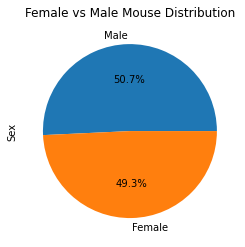

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = unique_mice_id_timepoint_df['Sex'].value_counts()
plot3 = sex_counts.plot.pie(autopct= "%1.1f%%", title="Female vs Male Mouse Distribution")
plt.show()

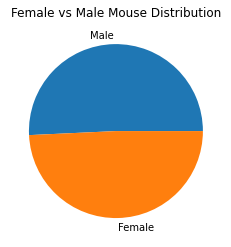

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = []
total_count_sex = []

for x, y in sex_counts.items():
    sex.append(x)
    total_count_sex.append(y)

plt.pie(total_count_sex, labels=sex)
plt.title("Female vs Male Mouse Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


unique_merged_df = complete_dataset.sort_values('Timepoint', ascending=False).drop_duplicates('Mouse ID').sort_index()
unique_merged_df
# print(unique_merged_df.to_string())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
selected_drugs = ["Capomulin", "Ramicane", "Ceftamin", "Infubinol"]


# Create empty list to fill with tumour vol data (for plotting)
tumour_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumour volumes
    # add subset 
    # Determine outliers using upper and lower bounds


for drug in selected_drugs:
    for index, row in unique_merged_df.iterrows():
        if row["Drug Regimen"] == drug:
            tumour_vol.append(row["Tumour Volume (mm3)"])

tumour_vol = sorted(tumour_vol)
tumour_vol_df = pd.DataFrame(tumour_vol, columns=['Volume'])

quartiles = tumour_vol_df.quantile([.25,.5,.75])


lowerq = quartiles.Volume[0.25]
upperq = quartiles.Volume[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f'Lower Bound of Tumour Volume(mm3) is: {lowerq}')
print(f'Upper bound of Tumour Volume(mm3) is: {upperq}')
print(f'The interquartile range of Tumour Volume(mm3) is: {iqr}')
print(f'The median of Tumour Volume(mm3) is: {quartiles.Volume[0.5]}')

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Lower Bound of Tumour Volume(mm3) is: 37.187743802499995
Upper bound of Tumour Volume(mm3) is: 59.930261755000004
The interquartile range of Tumour Volume(mm3) is: 22.74251795250001
The median of Tumour Volume(mm3) is: 45.0
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


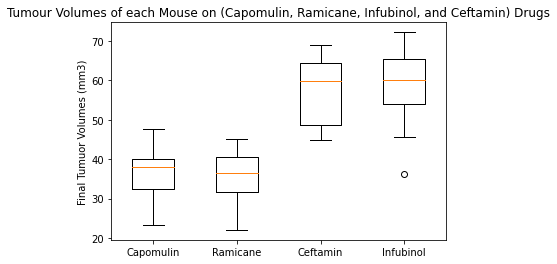

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

tumour_vol_Capomulin = []

for index, row in unique_merged_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumour_vol_Capomulin.append(row["Tumour Volume (mm3)"])

tumour_vol_Capomulin = sorted(tumour_vol_Capomulin)



tumour_vol_Ramicane = []

for index, row in unique_merged_df.iterrows():
    if row["Drug Regimen"] == 'Ramicane':
        tumour_vol_Ramicane.append(row["Tumour Volume (mm3)"])

tumour_vol_Ramicane = sorted(tumour_vol_Ramicane)



tumour_vol_Ceftamin = []

for index, row in unique_merged_df.iterrows():
    if row["Drug Regimen"] == 'Ceftamin':
        tumour_vol_Ceftamin.append(row["Tumour Volume (mm3)"])

tumour_vol_Ceftamin = sorted(tumour_vol_Ceftamin)



tumour_vol_Infubinol = []

for index, row in unique_merged_df.iterrows():
    if row["Drug Regimen"] == 'Infubinol':
        tumour_vol_Infubinol.append(row["Tumour Volume (mm3)"])

tumour_vol_Infubinol = sorted(tumour_vol_Infubinol)

tumour_volumes_all_drugs = [tumour_vol_Capomulin, tumour_vol_Ramicane, tumour_vol_Ceftamin, tumour_vol_Infubinol]


fig1, ax1 = plt.subplots()
ax1.set_title('Tumour Volumes of each Mouse on (Capomulin, Ramicane, Infubinol, and Ceftamin) Drugs')
ax1.set_ylabel("Final Tumuor Volumes (mm3)")
ax1.boxplot(tumour_volumes_all_drugs, labels=selected_drugs, widths= 0.5, vert= True)
plt.show()

## Line and Scatter Plots

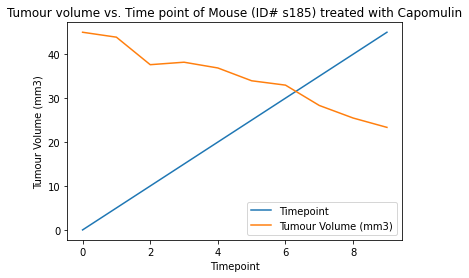

In [17]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
# Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  Tumour Volume (mm3)  Metastatic Sites
#  w150    Capomulin    Male          23          23         10            39.952347                 0
# unique_mice_id_timepoint_df

s185_df = unique_mice_id_timepoint_df.loc[unique_mice_id_timepoint_df['Mouse ID'] == 's185', :]
s185_timepoint = list(s185_df['Timepoint'])

s185_tum_vol = list(s185_df['Tumour Volume (mm3)'])

plt.plot(s185_timepoint)
plt.plot(s185_tum_vol)
plt.title('Tumour volume vs. Time point of Mouse (ID# s185) treated with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.legend(['Timepoint', 'Tumour Volume (mm3)'], loc='lower right')
plt.show()

Text(0, 0.5, 'Weight (g)')

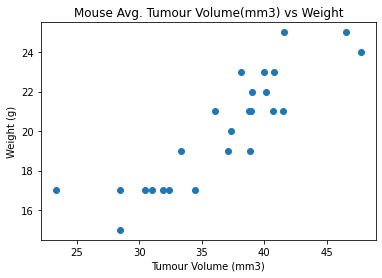

In [22]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

capomulin_df = unique_merged_df.loc[unique_merged_df['Drug Regimen'] == 'Capomulin', :]

plt.scatter(capomulin_df['Tumour Volume (mm3)'],capomulin_df['Weight (g)'])
plt.title('Mouse Avg. Tumour Volume(mm3) vs Weight')
plt.xlabel('Tumour Volume (mm3)')
plt.ylabel('Weight (g)')



## Correlation and Regression

Coorrelation between Mouse Weight and Avg. Tumour Volume is: 0.8767060403658116


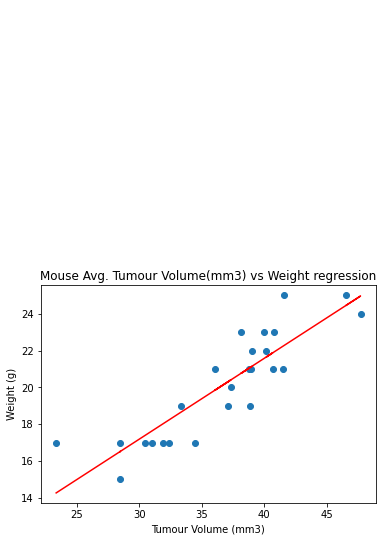

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen


correlation = st.pearsonr(capomulin_df['Weight (g)'],capomulin_df['Tumour Volume (mm3)'])

print(f'Coorrelation between Mouse Weight and Avg. Tumour Volume is: {correlation[0]}')


(slope, intercept,rvalue, pvalue, stderr) = linregress(capomulin_df['Tumour Volume (mm3)'], capomulin_df["Weight (g)"])

regress_values = capomulin_df['Tumour Volume (mm3)'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_df['Tumour Volume (mm3)'],capomulin_df['Weight (g)'])

plt.plot(capomulin_df['Tumour Volume (mm3)'], regress_values, color='red')

plt.annotate(line_eq,(20, 40),fontsize=15,color="red")

plt.title('Mouse Avg. Tumour Volume(mm3) vs Weight regression')
plt.xlabel('Tumour Volume (mm3)')
plt.ylabel('Weight (g)')

plt.show()





